In [2]:
#  import libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# import dataset
df = pd.read_csv("iris/iris.csv")

df = df[ df.Species != 'Iris-virginica']

# prepare features
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
x1 = np.ones(( len(X) ,1))
X = np.append(x1, X, axis=1)
y = df[['Species']]
y = y.replace('Iris-setosa', 0).replace('Iris-versicolor', 1).values

# split training & testing data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)


0.7531116800149156


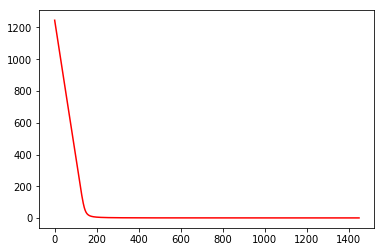

W =  [[ 0.15872072]
 [-2.17541872]
 [ 0.10847676]
 [ 2.83589109]
 [ 4.81586656]] 



In [57]:
def calcost(hp, y):
    lghp = []
    lghp1 = []
    for i in range(len(hp)):
        if(hp[i]==0) :
            lghp.insert( len(lghp), 0 )
        else :
            lghp.insert(len(lghp),math.log(hp[i]))
            
        if(hp[i]==1) :
            lghp1.insert( len(lghp1), 0 )
        else :
            lghp1.insert(len(lghp1),math.log(1 - hp[i]))
    
    lghp = np.array(lghp).reshape(( len(lghp), 1 ))
    lghp1 = np.array(lghp1).reshape(( len(lghp1), 1 ))
    
    ans = -np.dot( np.transpose(y), lghp) - np.dot( np.transpose(1-y), lghp1 )
#     print(ans)
    return ans[0][0]
    
def calhypothesis(z):
    size = z.shape[0]
    cal = []
    for it in range(size):
#         print(size, z[it], it)
        d1 = 1 / ( 1 + ( math.exp(-z[it]) ) )
        cal.insert(len(cal),d1)
    return np.array(cal)

# perform gradient descent
def performGD(X_train, y_train, theta):
    alpha = 0.01
    size = X_train.shape[0]
    z1 = np.dot( X_train , theta)
    hp = calhypothesis(z1)
    z2 = np.subtract(hp.reshape( (y_train.shape[0], 1) ), y_train)
#     print(hp.shape, z2.shape)
    
    z3 = np.dot( np.transpose(X_train), z2)
    z4 = z3*(alpha/size)
#     print("hello this is size ", theta.shape, z4.shape)
    return (theta - z4), calcost(hp, y_train)

# linear reg
def linearReg(X_train, y_train, X_test, y_test):
    size = X_train.shape[1]
    theta = np.arange(1, size + 1).reshape((size,1))
    cal = []
    
    iterations = 1450
    for it in range(iterations):
        theta, cost = performGD(X_train, y_train, theta)
        
#         y_pred = np.dot( X_test, theta)
#         y_size= y_pred.shape[0]
#         c1 = (math.sqrt(np.mean((y_pred - y_test)**2)))

        cal.insert(len(cal),cost)
        
    c = np.arange(iterations)
    print( cal[-1] )
    plt.plot(c, cal, 'r') 
#     plt.plot(c, y_test, 'b')
    plt.show()
    
    
    return theta

# call function

W = linearReg(X_train, y_train, X_test, y_test)

# print weights
print( "W = ", W,"\n")


In [58]:
df.shape

(100, 6)